<a href="https://colab.research.google.com/github/AftabUdaipurwala/MLProjects/blob/main/Mahindra_Manufacturing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/MahindraManufacturingAnalytics'

ManufacturingAnalytics.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/MahindraManufacturingAnalytics/ManufacturingAnalytics.csv')
df.head()

,ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape

(10000, 13)

In [41]:
df.isnull().sum(axis = 0)

ID                          0
Type                        6
Air temperature [K]        15
Process temperature [K]    13
Rotational speed [rpm]      8
Torque [Nm]                 4
Tool wear [min]             6
Machine failure             4
TWF                         4
HDF                         4
PWF                         4
OSF                         4
RNF                         4
dtype: int64

In [44]:
df1=df[df.isnull().any(axis='columns')]
df1.shape

(54, 13)

In [36]:
df[df.isnull().any(axis='columns')]

,ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,M,NaN,309.0,1741.0,28.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11,NaN,NaN,308.9,1782.0,23.9,24.0,0.0,0.0,0.0,0.0,0.0,0.0
11,12,NaN,298.6,309.1,1423.0,44.3,29.0,0.0,0.0,0.0,0.0,0.0,0.0
12,13,NaN,298.6,309.1,1339.0,51.1,34.0,0.0,0.0,0.0,0.0,0.0,0.0
13,14,NaN,298.6,309.2,1742.0,30.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
14,15,NaN,298.6,309.2,2035.0,19.6,40.0,0.0,0.0,0.0,0.0,0.0,0.0
15,16,NaN,298.6,309.2,1542.0,48.4,42.0,0.0,0.0,0.0,0.0,0.0,0.0
25,26,L,299.0,309.5,NaN,23.3,73.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,L,299.1,309.5,NaN,39.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df1= df.drop(['TWF','HDF','PWF','OSF','RNF','ID'], axis=1)
df1=df1.dropna(axis=0)
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
1,L,298.2,308.7,1408.0,46.3,3.0,0.0
2,L,298.1,308.5,1498.0,49.4,5.0,0.0
3,L,298.2,308.6,1433.0,39.5,7.0,0.0
4,L,298.2,308.7,1408.0,40.0,9.0,0.0
5,M,298.1,308.6,1425.0,41.9,11.0,0.0


In [13]:
df1.shape

(9946, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


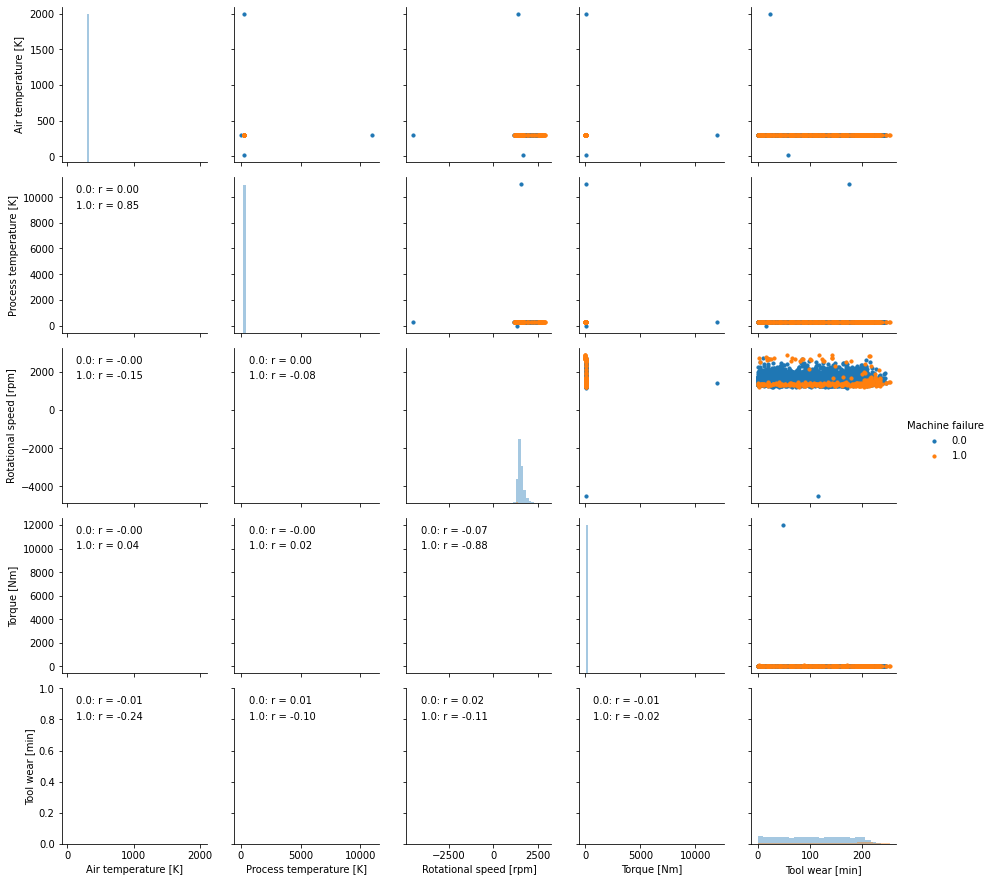

In [15]:
from scipy import stats
import seaborn as sns
import matplotlib

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    # count how many annotations are already present
    n = len([c for c in ax.get_children() if 
                  isinstance(c, matplotlib.text.Annotation)])
    pos = (.1, .9 - .1*n)
    
    ax.annotate("{}: r = {:.2f}".format(kws['label'],r),
                xy=pos, xycoords=ax.transAxes)


g = sns.PairGrid(data = df1, hue="Machine failure")
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(corrfunc)
g.add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc83783c150>,
      dtype=object)

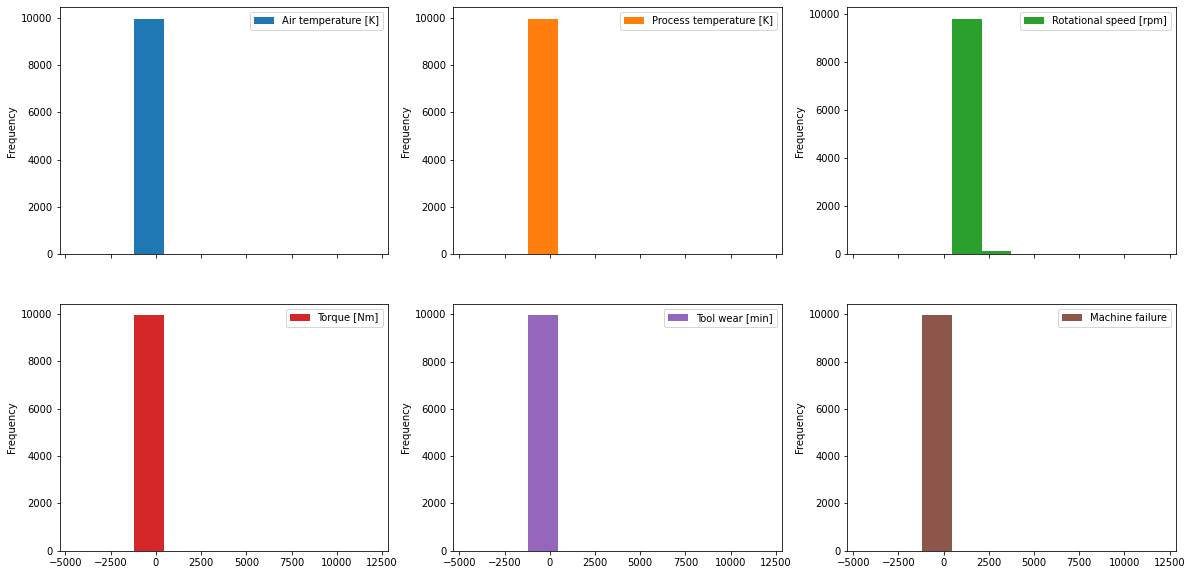

In [16]:
df1.plot.hist(subplots=True, legend=True, layout=(2, 3))

In [31]:
df2 = df.dropna(axis=0)
df2= df2.drop(['ID'],axis=1)
col_names = df2.columns

for i in col_names:
  x = len(df2[i].unique())
  print('Column Name is ',i,'Count of Unique values is ',x)

Column Name is  Type Count of Unique values is  3
Column Name is  Air temperature [K] Count of Unique values is  95
Column Name is  Process temperature [K] Count of Unique values is  84
Column Name is  Rotational speed [rpm] Count of Unique values is  940
Column Name is  Torque [Nm] Count of Unique values is  577
Column Name is  Tool wear [min] Count of Unique values is  246
Column Name is  Machine failure Count of Unique values is  2
Column Name is  TWF Count of Unique values is  2
Column Name is  HDF Count of Unique values is  2
Column Name is  PWF Count of Unique values is  2
Column Name is  OSF Count of Unique values is  2
Column Name is  RNF Count of Unique values is  2


In [34]:
pd.crosstab(df['Machine failure'], df['OSF'])

OSF,0.0,1.0
Machine failure,,
0.0,9658,0
1.0,240,98
